In [23]:
import kagglehub
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
path = kagglehub.dataset_download("puneet6060/intel-image-classification")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2


In [25]:
dataset_path = path  # Use the path obtained from kagglehub

In [26]:
train_dir = os.path.join(dataset_path, 'seg_train', 'seg_train')  # Update to point to the correct directory
print("Training directory path:", train_dir)

# Step 4: Check contents of 'seg_train'
if os.path.exists(train_dir):
    print("\nContents of 'train_dir':")
    print(os.listdir(train_dir))
else:
    print("'train_dir' directory not found.")

Training directory path: /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2/seg_train/seg_train

Contents of 'train_dir':
['buildings', 'glacier', 'street', 'forest', 'sea', 'mountain']


Visualize a few samples from the dataset, displaying their corresponding
labels.

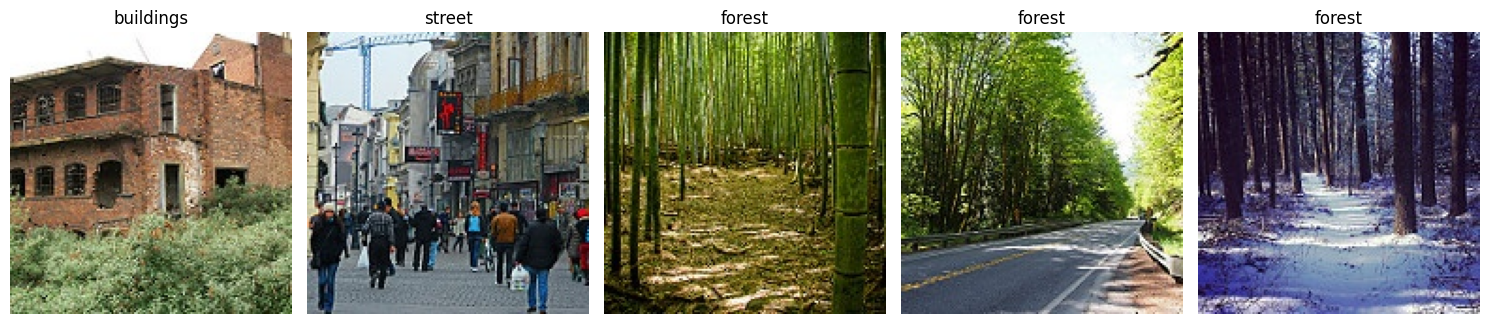

In [27]:
def visualize_random_images(category_path, num_samples=5):
    subdirs = os.listdir(category_path)

    plt.figure(figsize=(15, 10))

    for i in range(num_samples):
        selected_subdir = random.choice(subdirs)
        selected_path = os.path.join(category_path, selected_subdir)
        image_files = [f for f in os.listdir(selected_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        random_image = random.choice(image_files)
        image_to_load = os.path.join(selected_path, random_image)

        # Load the image
        image = Image.open(image_to_load)

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.title(selected_subdir)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize random images
visualize_random_images(train_dir)

In [28]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))  # 6 classes in the dataset

# Step 7: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,830,022 (18.43 MB)

 Trainable params: 4,829,574 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [35]:
#Set up data augmentation and normalization for training
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                    validation_split=0.2,  # Use 20% of the training data for validation
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

#Load train and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    subset='validation'
)

#Set up the test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Only rescale for test data

#Load test data
test_dir = os.path.join(dataset_path, 'seg_test', 'seg_test')  # Update this path if necessary
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,           # Number of images to return in each batch
    class_mode='categorical' # For multi-class classification
)

# Verify the classes
print("Class indices:", train_generator.class_indices)
print("Test class indices:", test_generator.class_indices)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Class indices: {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
Test class indices: {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


Compile the Model

In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Training the model

In [31]:
# Train the model
history = model.fit(train_generator, epochs=25, validation_data=validation_generator)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 107s 272ms/step - accuracy: 0.3049 - loss: 2.9763 - val_accuracy: 0.2753 - val_loss: 3.6233
Epoch 2/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 124s 242ms/step - accuracy: 0.3000 - loss: 1.5793 - val_accuracy: 0.3270 - val_loss: 3.5475
Epoch 3/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 86s 242ms/step - accuracy: 0.3273 - loss: 1.5548 - val_accuracy: 0.4683 - val_loss: 1.7668
Epoch 4/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 90s 254ms/step - accuracy: 0.3994 - loss: 1.4404 - val_accuracy: 0.4533 - val_loss: 1.4520
Epoch 5/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 86s 243ms/step - accuracy: 0.4194 - loss: 1.3551 - val_accuracy: 0.5243 - val_loss: 1.3373
Epoch 6/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 87s 244ms/step - accuracy: 0.4437 - loss: 1.3345 - val_accuracy: 0.3841 - val_loss: 2.7737
Epoch 7/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 86s 242ms/step - accuracy: 0.4653 - loss: 1.2890 - val_accuracy: 0.5125 - val_loss: 1.1559
Epoch 8/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 142s 242ms/step - accuracy: 0.4630 - loss: 1.2797 - 

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.7411 - loss: 0.8856
Test Accuracy: 72.60%


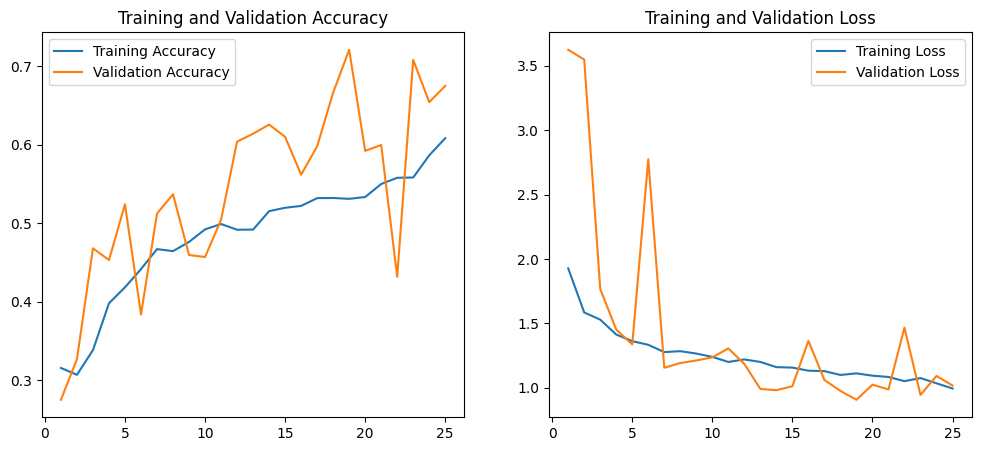

In [37]:
# Evaluate on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot accuracy and loss curves
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step


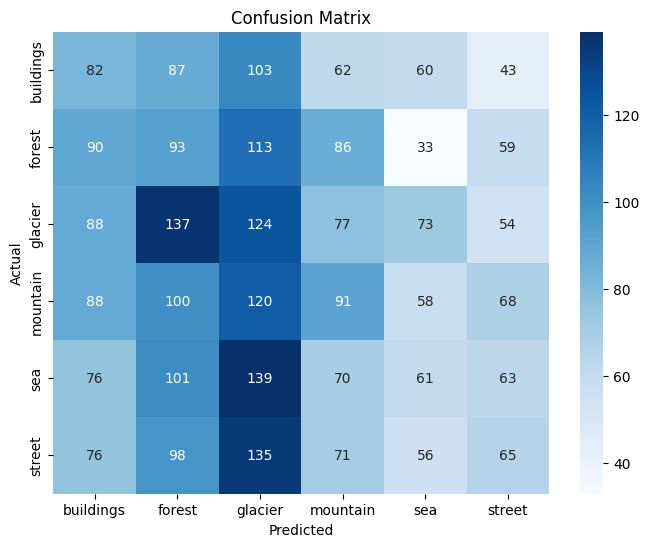

In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the classes for test data
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
